# MNIST TF 1.15 구현

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('../data/digit-recognizer/train.csv')

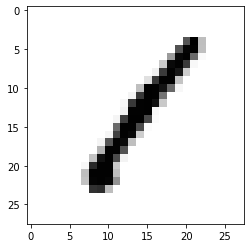

In [3]:
# 결측치, 이상치 없음
# 이미지 확인
img_data = df.drop('label', axis=1, inplace=False).values

plt.imshow(img_data[0].reshape(-1,28), cmap='Greys', interpolation='nearest')
plt.show()

In [4]:
# train test split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'],
                 test_size=0.3, random_state=0)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)

x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [ ]:
# Tensorflow 구현

# One-hot encording
sess = tf.Session()
t_data_train_onehot = sess.run(tf.one_hot(t_data_train, depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test, depth=10))

# placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
T = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# W & b (hidden layer 1)
W2 = tf.Variable(tf.random.normal([784, 64]))
b2 = tf.Variable(tf.random.normal([64]))
layer2 = tf.sigmoid(tf.matmul(X, W2) + b2)

# hidden layer 2
W3 = tf.Variable(tf.random.normal([64, 32]))
b3 = tf.Variable(tf.random.normal([32]))
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

# hidden layer 3
W4 = tf.Variable(tf.random.normal([32, 16]))
b4 = tf.Variable(tf.random.normal([16]))
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# output layer
W5 = tf.Variable(tf.random.normal([16, 10]))
b5 = tf.Variable(tf.random.normal([10]))

logit = tf.matmul(layer4, W5) +b5
H = tf.nn.softmax(logit)

# loss fuction
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# initializer
sess.run(tf.global_variables_initializer())

In [ ]:
# Learning
for step in range(10000):
    _, loss_val = sess.run([train, loss], feed_dict={X: x_data_train_norm, 
                                                     T: t_data_train_onehot})
    
    if step % 1000 == 0:
        print('loss: {}'.format(loss_val))

In [ ]:
# Accuracy
predict = tf.argmax(H, 1)
correct = tf.equal(predict, tf.argmax(T, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X: x_data_test_norm, 
                                       T: t_data_test_onehot})
print('정확도 : {}'.format(result))

## weight의 초기값을 지정하는 방법 변경

In [ ]:
# Tensorflow 구현

# One-hot encording
sess = tf.Session()
t_data_train_onehot = sess.run(tf.one_hot(t_data_train, depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test, depth=10))

# placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
T = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# W & b (hidden layer 1)
# Xavier Initialization 
# 입력의 개수와 출력의 개수를 이용해서 Weight의 초기값을 결정하는 방법
# W = np.random.randn(num_of_input, num_of_output) / np.squrt(num_of_input)
# tf.contrib.layers.xavier_initializer()
# He's Initialization : Xavier Initialization의 확장 버전
# W = np.random.randn(num_of_input, num_of_output) / np.squrt(num_of_input/2)
# # tf.contrib.layers.variance_scaling_initializer 

W2 = tf.get_variable('W2', shape=[784, 64],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random.normal([64]))
layer2 = tf.nn.relu(tf.matmul(X, W2) + b2)

# hidden layer 2
W3 = tf.get_variable('W3', shape=[64, 32], 
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random.normal([32]))
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# hidden layer 3
W4 = tf.get_variable('W4', shape=[32, 16], 
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random.normal([16]))
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)

# output layer

W5 = tf.get_variable('W5', shape=[16, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random.normal([10]))

logit = tf.matmul(layer4, W5) +b5
H = tf.nn.softmax(logit)

# loss fuction
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# initializer
sess.run(tf.global_variables_initializer())

In [ ]:
# Learning
for step in range(5000):
    _, loss_val = sess.run([train, loss], feed_dict={X: x_data_train_norm, 
                                                     T: t_data_train_onehot})
    
    if step % 500 == 0:
        print('loss: {}'.format(loss_val))

In [ ]:
# Accuracy
predict = tf.argmax(H, 1)
correct = tf.equal(predict, tf.argmax(T, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X: x_data_test_norm, 
                                       T: t_data_test_onehot})
print('정확도 : {}'.format(result))

## Dropout

In [5]:
# One-hot encording
sess = tf.Session()
t_data_train_onehot = sess.run(tf.one_hot(t_data_train, depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test, depth=10))

# placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
T = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# W & b (hidden layer 1)
W2 = tf.get_variable('W2', shape=[784, 64],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random.normal([64]))
_layer2 = tf.nn.relu(tf.matmul(X, W2) + b2)
layer2 = tf.nn.dropout(_layer2, rate=0.3)

# hidden layer 2
W3 = tf.get_variable('W3', shape=[64, 32], 
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random.normal([32]))
_layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)
layer3 = tf.nn.dropout(_layer3, rate=0.3)

# hidden layer 3
W4 = tf.get_variable('W4', shape=[32, 16], 
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random.normal([16]))
_layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)
layer4 = tf.nn.dropout(_layer4, rate=0.3)

# output layer
W5 = tf.get_variable('W5', shape=[16, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random.normal([10]))

logit = tf.matmul(layer4, W5) +b5
H = tf.nn.softmax(logit)

# loss fuction
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# initializer
sess.run(tf.global_variables_initializer())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [8]:
# Learning
for step in range(5000):
    _, loss_val = sess.run([train, loss], feed_dict={X: x_data_train_norm, 
                                                     T: t_data_train_onehot})
    
    if step % 500 == 0:
        print('loss: {}'.format(loss_val))

loss: 0.784061849117279
loss: 0.673759937286377
loss: 0.613986611366272
loss: 0.5663807392120361
loss: 0.5256711840629578
loss: 0.48989272117614746
loss: 0.46064406633377075
loss: 0.43761175870895386
loss: 0.41839364171028137
loss: 0.40192481875419617


In [9]:
# Accuracy
predict = tf.argmax(H, 1)
correct = tf.equal(predict, tf.argmax(T, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X: x_data_test_norm, 
                                       T: t_data_test_onehot})
print('정확도 : {}'.format(result))

정확도 : 0.8653967976570129
